In [ ]:
import os
os.chdir('/nfs/pic.es/user/m/mbilkis/cdisc')
import sys
sys.path.insert(0, os.getcwd())

import numpy as np
from numerics.utilities.misc import *
import pickle
import numpy as np
from tqdm import tqdm
import argparse



In [ ]:
Ntraj = 100
omega0, omega1 = 1e4, 1.05e4
omega_pro = (omega0 + omega1)/2
period = (2*np.pi/omega_pro)
dt = period/100
total_time = 100*period
exp_path = "freqs/{}/".format([omega0,omega1])
save_path = get_path_config(exp_path=exp_path,total_time=total_time, dt=dt, noitraj=True)
os.makedirs(save_path, exist_ok=True)


###########################
# ###### LOAD DATA
times = np.arange(0, total_time+ dt, dt )
indis = np.linspace(0,len(times)-1, int(1e4)).astype(int)
timind = [times[k] for k in indis]
indis_range = list(range(len(indis)))


B = 6.
dB = .05
boundsB= np.arange(-B,B+dB,dB)

bpos = boundsB[boundsB>=0]
bneg = boundsB[boundsB<0]


deter, stop = {}, {}
stop["_0"] = {i:[] for i in range(1,Ntraj)}
stop["_1"] = {i:[] for i in range(1,Ntraj)}
deter["h0/h1"] ={indb:[0]*len(indis) for indb in range(len(boundsB))}
deter["h1/h0"] = {indb:[0]*len(indis) for indb in range(len(boundsB))}



def load_traj(itraj, what="logliks.npy", flip_params=0):
    gamma0 = gamma1 = 100
    eta0 = eta1 = 1
    kappa0 = kappa1 = 1e3
    n0 = n1 = 1
    omega0, omega1 = 1e4, 1.05e4

    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]

    omega_pro = (omega0 + omega1)/2
    period = (2*np.pi/omega_pro)
    dt = period/100
    total_time = 100*period
    if flip_params == 1:
        params = [h0, h1]
    else:
        params = [h1,h0]
    exp_path = str(params)+"/"

    l =load_data(exp_path=exp_path, itraj=itraj, total_time=total_time, dt=dt, what=what)
    return l

In [ ]:
l1t, l0t = [],[]
n=1
ers = []
for itraj in tqdm(range(1,Ntraj)):
    try:

        [l0_1,l1_1], [l1_0,l0_0] = load_traj(itraj=itraj,what="logliks.npy", flip_params=0).T, load_traj(itraj=itraj,what="logliks.npy", flip_params=1).T
        log_lik_ratio, log_lik_ratio_swap = l1_1-l0_1, l1_0-l0_0

        for indb,b in enumerate(boundsB):
            deter["h0/h1"][indb] += ((log_lik_ratio[indis_range] < b).astype(int)  - deter["h0/h1"][indb])/n
            deter["h1/h0"][indb] += ((log_lik_ratio_swap[indis_range] > b).astype(int)  - deter["h1/h0"][indb])/n
            if b>=0:
                stop["_1"][itraj].append(get_stop_time(log_lik_ratio, b, timind))
                stop["_0"][itraj].append(get_stop_time(log_lik_ratio_swap, b,timind))
        n+=1
    except Exception:
        ers.append(itraj)
        print("error {}".format(itraj))
        


data saved in /data/uab-giq/scratch/matias/quantera/trajectories/mechanical_freq/freqs/[10000.0, 10500.0]//T_0.06129936885053255_dt_6.129936885053255e-06/B6.0_db0.05_100/



In [10]:
import matplotlib.pyplot as plt 

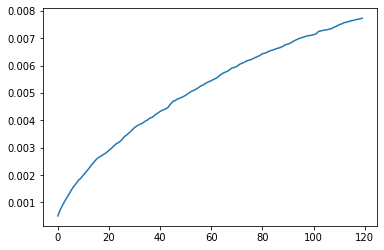

In [9]:
.plot(times_sequential)